#Big Data Coursework
#By Ashley Arik (850904)

ALL THE IMPORTS!!

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle as pickle

import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt

import csv

import numpy as np
from sklearn.linear_model import LinearRegression as LR
from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
# from sklearn import svm
# from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

from keras.layers import Dense, Flatten, Dropout
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.preprocessing.image import ImageDataGenerator
import keras

from keras.datasets import mnist
import matplotlib.pyplot as plt
import skimage.feature

from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import sklearn


import torch

#Standard Code to Run before each Model - Very important

Loading Data sorry in advance if the imports don't have the path as your machine. If you replace the "root" variable with the folder you store the data then it should work perfectly

In [ ]:
root = './drive/MyDrive/Colab Notebooks/Coursework/Big_Data_and_Machine_Learning_Coursework/'

fineLabels = np.loadtxt(root + "fine_labels.csv", dtype = str, delimiter=",")
coarseLabels = np.loadtxt(root + "coarse_labels.csv", dtype = str, delimiter=",")

trnImage = np.load(root + 'trnImage.npy')
trnLabelCor = np.load(root + 'trnLabel_coarse.npy') 
trnLabelFine = np.load(root + 'trnLabel_fine.npy')
tstImage = np.load(root + 'tstImage.npy')
tstLabelCor = np.load(root + 'tstLabel_coarse.npy')
tstLabelFine = np.load(root + 'tstLabel_fine.npy')

Changing format of Data to be fed into the machine learning algorithm

In [ ]:
trnImage = np.transpose(trnImage, (3, 0, 1, 2))
tstImage = np.transpose(tstImage, (3, 0, 1, 2))
# x = tf.random.normal(trnImage.shape)
# trnImage = trnImage.reshape(50000, 3072)
print(trnImage.shape)
print(tstImage.shape)

#Confusion Matrix (Creating defination that will be called later)

In [5]:
fineLabels = np.loadtxt(root + "fine_labels.csv", dtype = str, delimiter=",")
coarseLabels = np.loadtxt(root + "coarse_labels.csv", dtype = str, delimiter=",")
          

print(coarseLabels.shape)
coarseLabelsArray = []
fileLabelsArray = []
for i in coarseLabels:
  coarseLabelsArray.append(i)
for i in fineLabels:
  fileLabelsArray.append(i)
print(coarseLabelsArray)
print(fileLabelsArray)

(20,)
['aquatic mammals', 'fish', 'flowers', 'food containers', 'fruit and vegetables', 'household electrical devices', 'household furniture', 'insects', 'large carnivores', 'large man-made outdoor things', 'large natural outdoor scenes', 'large omnivores and herbivores', 'medium-sized mammals', 'non-insect invertebrates', 'people', 'reptiles', 'small mammals', 'trees', 'vehicles 1', 'vehicles 2']
['apples', 'aquarium fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottles', 'bowls', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'cans', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cups', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn-mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple', 'motorcycle', 'mountain', 'mouse', 'mushrooms', 'oak', 'oranges', 'orchids', 'otter', 'palm', 'pears', 'pickup truc

In [22]:
# print(tstImage.shape)
def get_confusion_matrix(model, tstImage, tstLabel, label_names):
  predicted_labels = np.argmax(model.predict(tstImage), axis=1)
  cm = confusion_matrix(tstLabel, predicted_labels)
  cnn_n = ConfusionMatrixDisplay(cm,display_labels=label_names)
  return(cnn_n)


Below is the format of how to summon the confusion matrix using the Funciton

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

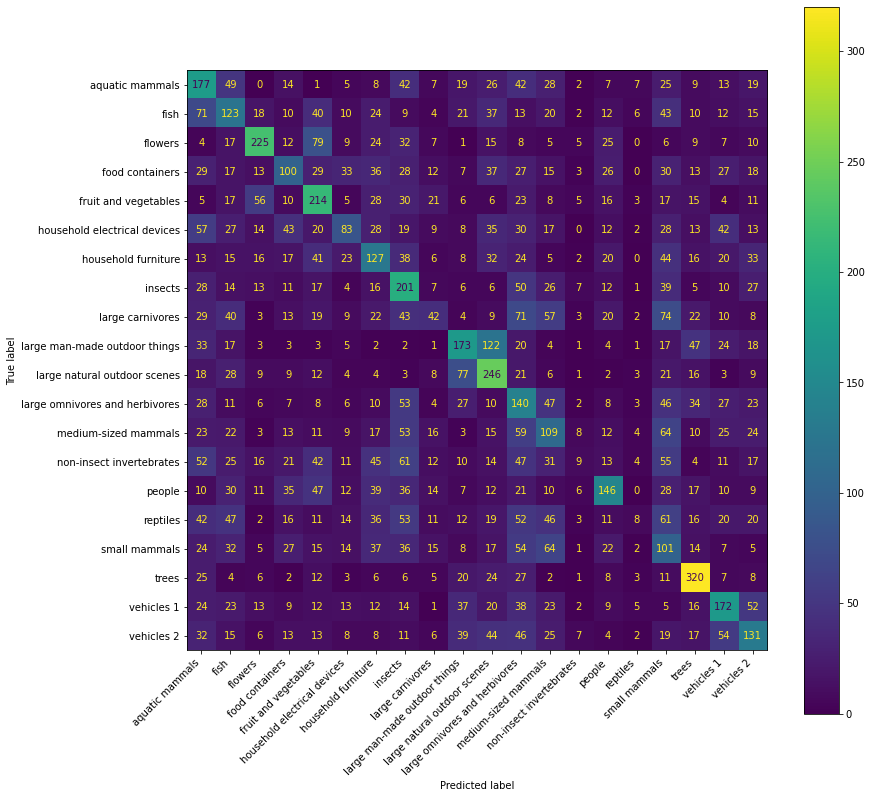

In [ ]:
# cnn_n = get_confusion_matrix(model, tstImage, tstLabelCor, coarseLabels)

# fig, ax = plt.subplots(figsize = (13,13))
# cnn_n.plot(ax = ax)
# plt.xticks(rotation = 45, ha = "right")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

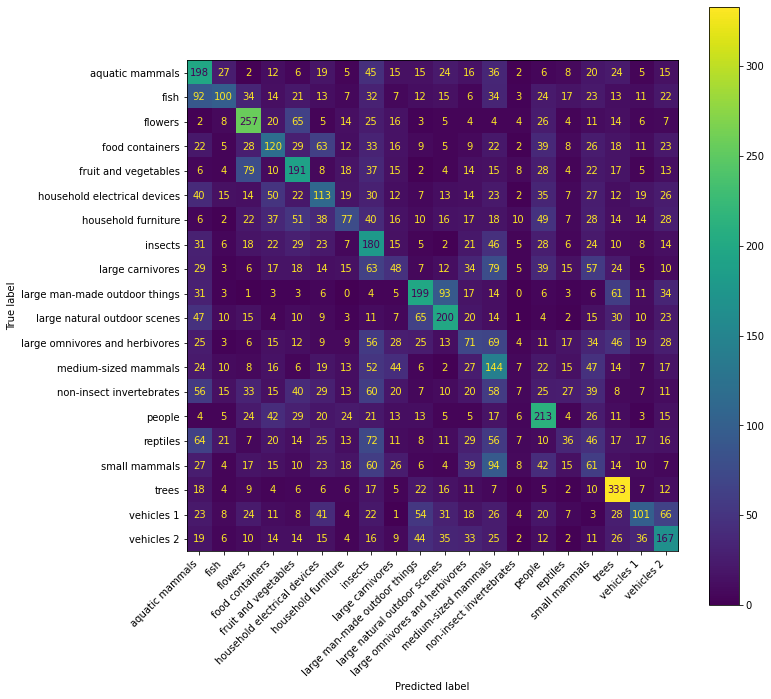

In [59]:
cnn_n = get_confusion_matrix(model, tstImage, tstLabelCor, coarseLabels)

fig, ax = plt.subplots(figsize = (11,11))
cnn_n.plot(ax = ax)
plt.xticks(rotation = 45, ha = "right")

In [60]:

# model = Sequential()
# model.add(Conv2D(64, (3,3), input_shape = trnImage.shape[1:]))
# model.add(Activation("relu"))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model = Sequential()
# model.add(Conv2D(64), (3,3))
# model.add(Activation("relu"))
# model.add(MaxPooling2D(pool_size=(2,2)))

# # flatten down to a 1D array
# model.add(Flatten())
# model.add(Dense(64))

# model.add(Dense(1))
# model.add(Activation('sigmoid'))

# model.compile(loss="categorical_crossentropy",
#               optimizer="adam",
#               metrics=['accuracy'])

# model.fit(X, y, batch_size=32, validation_split=0.1)

#CNN Method

Print out shape of files and Extract features (Extracting features commented out for time purposes currently)

In [73]:
print(f'Images Shape: {trnImage.shape}')
print(f'Images Fine Labels Shape: {trnLabelFine.shape}')
print(f'Images Coarse Labels Shape: {trnLabelCor.shape}')

print('~~~~~~~~~~~~~~~~~~~~~~~~~~~')

print(f'Images Shape: {tstImage.shape}')
print(f'Images Fine Labels Shape: {tstLabelFine.shape}')
print(f'Images Coarse Labels Shape: {tstLabelCor.shape}')
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print(fineLabels)
  

Images Shape: (32, 32, 3, 50000)
Images Fine Labels Shape: (50000,)
Images Coarse Labels Shape: (50000,)
~~~~~~~~~~~~~~~~~~~~~~~~~~~
Images Shape: (32, 32, 3, 10000)
Images Fine Labels Shape: (10000,)
Images Coarse Labels Shape: (10000,)
~~~~~~~~~~~~~~~~~~~~~~~~~~~
['apples' 'aquarium fish' 'baby' 'bear' 'beaver' 'bed' 'bee' 'beetle'
 'bicycle' 'bottles' 'bowls' 'boy' 'bridge' 'bus' 'butterfly' 'camel'
 'cans' 'castle' 'caterpillar' 'cattle' 'chair' 'chimpanzee' 'clock'
 'cloud' 'cockroach' 'couch' 'crab' 'crocodile' 'cups' 'dinosaur'
 'dolphin' 'elephant' 'flatfish' 'forest' 'fox' 'girl' 'hamster' 'house'
 'kangaroo' 'keyboard' 'lamp' 'lawn-mower' 'leopard' 'lion' 'lizard'
 'lobster' 'man' 'maple' 'motorcycle' 'mountain' 'mouse' 'mushrooms' 'oak'
 'oranges' 'orchids' 'otter' 'palm' 'pears' 'pickup truck' 'pine' 'plain'
 'plates' 'poppies' 'porcupine' 'possum' 'rabbit' 'raccoon' 'ray' 'road'
 'rocket' 'roses' 'sea' 'seal' 'shark' 'shrew' 'skunk' 'skyscraper'
 'snail' 'snake' 'spider' '

Note: Course files are the training and testing labels 

Note: Fine files are the training and testing labels

Transposing the Data so it's in the right format to be processed by the model (Samples, Width, Height, RGB)


In [74]:
trnImage = np.transpose(trnImage, (3, 0, 1, 2))
tstImage = np.transpose(tstImage, (3, 0, 1, 2))
# x = tf.random.normal(trnImage.shape)
# trnImage = trnImage.reshape(50000, 3072)
print(trnImage.shape)
print(tstImage.shape)
# print(x.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


Normalising Data (RGB already between 0 and 1 so this part is not neccary)

In [75]:
# trnImage = np.expand_dims(trnImage, axis=3)

# trnImage = trnImage/255
# tstImage = tstImage/255

Creating Model

In [76]:
model = tf.keras.Sequential(layers=[
    tf.keras.layers.Conv2D(3, (1,1), activation = ("relu"), input_shape = trnImage.shape[1:]),
    # tf.keras.layers.Conv2D(2, 3, input_shape = trnImage.shape[1:], activation = ("relu")),
    tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2, 2), padding="same"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(30 , activation = ("relu")),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation=tf.nn.softmax)])
# tf.keras.layers.dropout()
print(trnImage.shape[1:])
# opt = tf.keras.optimizers.Adamax()

(32, 32, 3)


Compiling Data

In [77]:
model.compile(optimizer=tf.keras.optimizers.SGD(), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              metrics=tf.keras.metrics.SparseCategoricalAccuracy())
# model.add(Flatten())

Training Model (Syntax correct but need to work on model to train it properly)

In [78]:
history = model.fit(trnImage, trnLabelCor, epochs=40, validation_split=0.2, verbose=1, validation_data = (tstImage, tstLabelCor))

Epoch 1/40
1250/1250 [==============================] - 14s 11ms/step - loss: 2.8801 - sparse_categorical_accuracy: 0.1032 - val_loss: 2.7668 - val_sparse_categorical_accuracy: 0.1419
Epoch 2/40
1250/1250 [==============================] - 12s 10ms/step - loss: 2.7340 - sparse_categorical_accuracy: 0.1451 - val_loss: 2.6600 - val_sparse_categorical_accuracy: 0.1824
Epoch 3/40
1250/1250 [==============================] - 12s 10ms/step - loss: 2.6660 - sparse_categorical_accuracy: 0.1689 - val_loss: 2.6008 - val_sparse_categorical_accuracy: 0.1954
Epoch 4/40
1250/1250 [==============================] - 12s 10ms/step - loss: 2.6233 - sparse_categorical_accuracy: 0.1840 - val_loss: 2.5680 - val_sparse_categorical_accuracy: 0.2118
Epoch 5/40
1250/1250 [==============================] - 12s 10ms/step - loss: 2.5935 - sparse_categorical_accuracy: 0.1941 - val_loss: 2.5402 - val_sparse_categorical_accuracy: 0.2163
Epoch 6/40
1250/1250 [==============================] - 12s 10ms/step - loss: 2.

In [79]:
model.summary()
model.evaluate(x=trnImage, y=trnLabelCor, verbose = 1)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 32, 32, 3)         12        
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 16, 16, 3)        0         
 2D)                                                             
                                                                 
 flatten_17 (Flatten)        (None, 768)               0         
                                                                 
 dense_25 (Dense)            (None, 30)                23070     
                                                                 
 flatten_18 (Flatten)        (None, 30)                0         
                                                                 
 dropout_7 (Dropout)         (None, 30)                0         
                                                      

[2.2326626777648926, 0.314520001411438]

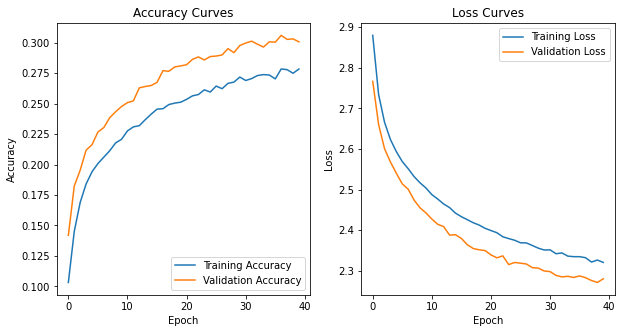

In [80]:
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy',
           'Validation Accuracy'])
plt.title('Accuracy Curves')

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss',
           'Validation Loss'])
plt.title('Loss Curves')
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

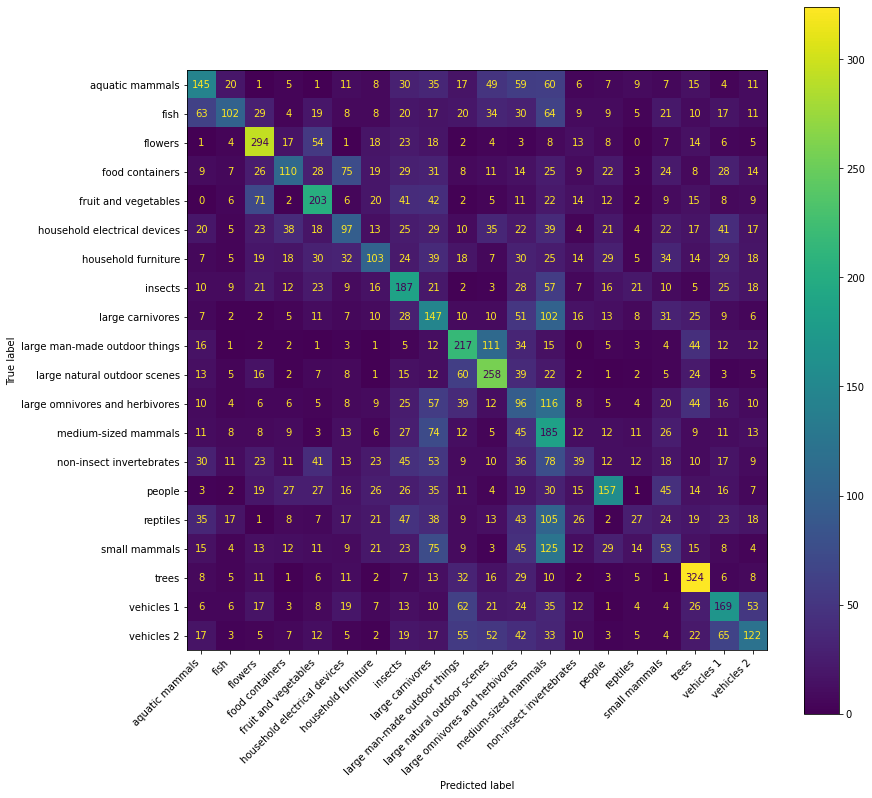

In [81]:
cnn_n = get_confusion_matrix(model, tstImage, tstLabelCor, coarseLabels)

fig, ax = plt.subplots(figsize = (13,13))
cnn_n.plot(ax = ax)
plt.xticks(rotation = 45, ha = "right")
# plt.xlabel(coarseLabelsArray)

#Fully Connected Nueral network Model

Buidling the model

In [67]:
model = tf.keras.Sequential(layers=[
    tf.keras.layers.Input(shape = trnImage.shape[1:]),
    tf.keras.layers.Dense(30, activation = ('relu')),
    tf.keras.layers.Dense(5, activation = ('relu')),
    tf.keras.layers.Dense(10, activation = ('relu')),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(20, activation=tf.nn.softmax)])
print(trnImage.shape[1:])

(32, 32, 3)


In [68]:
model.compile(optimizer=tf.keras.optimizers.SGD(), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              metrics=tf.keras.metrics.SparseCategoricalAccuracy())

history = model.fit(trnImage, trnLabelCor, epochs=40, validation_split=0.2, verbose=1, validation_data = (tstImage, tstLabelCor))

Epoch 1/40
1250/1250 [==============================] - 26s 20ms/step - loss: 2.7907 - sparse_categorical_accuracy: 0.1316 - val_loss: 2.5546 - val_sparse_categorical_accuracy: 0.2214
Epoch 2/40
1250/1250 [==============================] - 25s 20ms/step - loss: 2.4973 - sparse_categorical_accuracy: 0.2341 - val_loss: 2.4534 - val_sparse_categorical_accuracy: 0.2511
Epoch 3/40
1250/1250 [==============================] - 25s 20ms/step - loss: 2.4333 - sparse_categorical_accuracy: 0.2546 - val_loss: 2.4393 - val_sparse_categorical_accuracy: 0.2585
Epoch 4/40
1250/1250 [==============================] - 25s 20ms/step - loss: 2.3927 - sparse_categorical_accuracy: 0.2688 - val_loss: 2.4365 - val_sparse_categorical_accuracy: 0.2468
Epoch 5/40
1250/1250 [==============================] - 25s 20ms/step - loss: 2.3550 - sparse_categorical_accuracy: 0.2802 - val_loss: 2.3535 - val_sparse_categorical_accuracy: 0.2783
Epoch 6/40
1250/1250 [==============================] - 25s 20ms/step - loss: 2.

In [69]:
model.summary()
model.evaluate(x=trnImage, y=trnLabelCor, verbose = 1)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 32, 32, 30)        120       
                                                                 
 dense_22 (Dense)            (None, 32, 32, 5)         155       
                                                                 
 dense_23 (Dense)            (None, 32, 32, 10)        60        
                                                                 
 flatten_16 (Flatten)        (None, 10240)             0         
                                                                 
 dense_24 (Dense)            (None, 20)                204820    
                                                                 
Total params: 205,155
Trainable params: 205,155
Non-trainable params: 0
_________________________________________________________________
1563/1563 [==============================] - 13s

[1.729637861251831, 0.486380010843277]

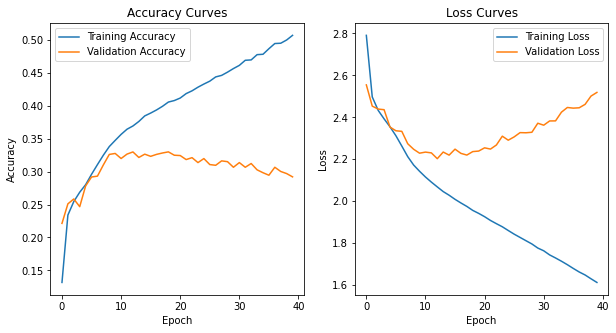

In [70]:
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy',
           'Validation Accuracy'])
plt.title('Accuracy Curves')

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss',
           'Validation Loss'])
plt.title('Loss Curves')
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

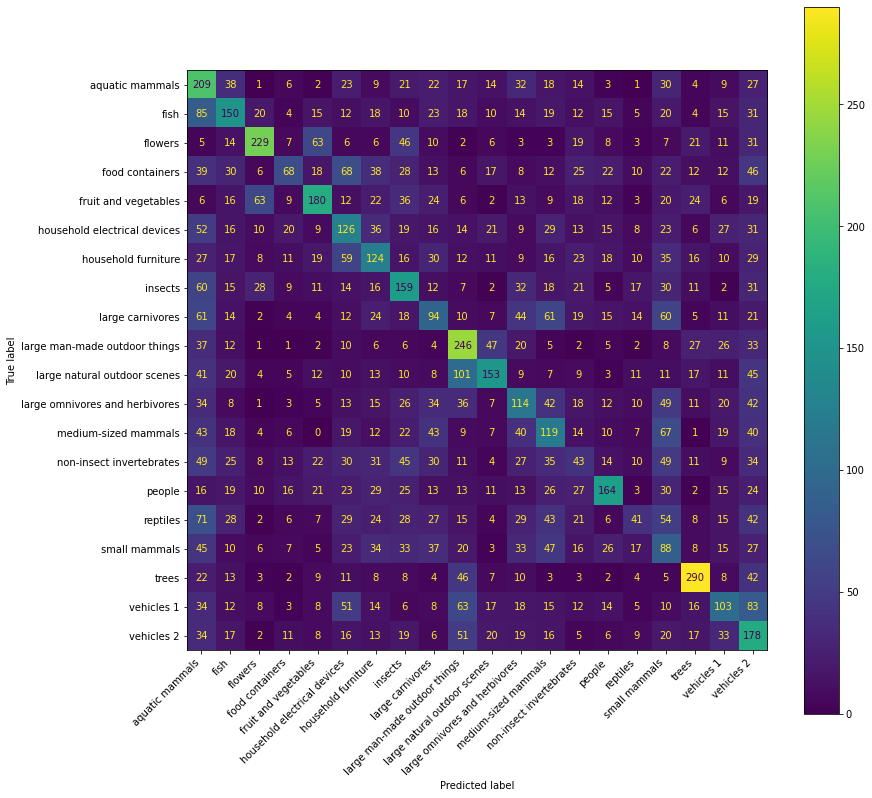

In [71]:
fcnn_n = get_confusion_matrix(model, tstImage, tstLabelCor, coarseLabels)

fig, ax = plt.subplots(figsize = (13,13))
fcnn_n.plot(ax = ax)
plt.xticks(rotation = 45, ha = "right")
# plt.xlabel(coarseLabelsArray)